In [1]:
import pandas as pd 
df = pd.read_stata('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/ols/maketable1.dta')
df.head()


,shortnam,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
0,AFG,0.000000,1.0,NaN,NaN,1.0,2.0,1.0,1.0,93.699997,4.540098,NaN,NaN
1,AGO,8.000000,1.0,5.363636,7.770645,3.0,3.0,0.0,1.0,280.000000,5.634789,-3.411248,1.0
2,ARE,0.000000,1.0,7.181818,9.804219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,60.000004,1.0,6.386364,9.133459,1.0,6.0,3.0,3.0,68.900002,4.232656,-0.872274,1.0
4,ARM,0.000000,0.0,NaN,7.682482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


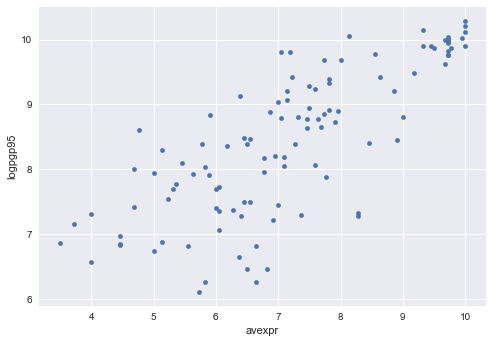

In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

df.plot(x ='avexpr', y = 'logpgp95', kind = 'scatter' )
plt.show()



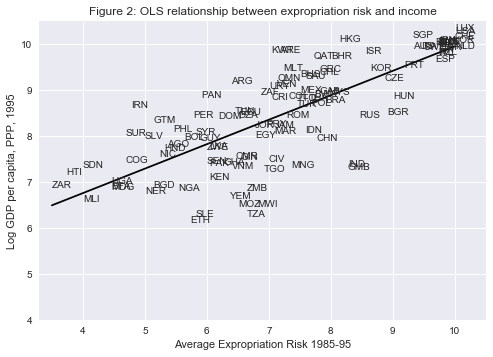

In [4]:
import numpy as np
import matplotlib.pyplot as plt

"""Since we have some Na's in our data lets get rid of them"""

df_subset = df.dropna(subset = ['avexpr', 'logpgp95'])

x = df_subset['avexpr']
y = df_subset['logpgp95']
labels = df_subset['shortnam']

plt.scatter(x, y, marker = '') 

## Our marker is empty here so i will use enumerate function split the data and call in by using loc function to get them on the our chart 

for i, label in enumerate(labels):
    plt.annotate(label, (x.iloc[i], y.iloc[i]))

    
## Now i want a linear fit for all the points mentioned 

plt.plot(np.unique(x), np.poly1d(np.polyfit(x,y,1))(np.unique(x)), color = 'black')


plt.xlim([3.3, 10.5])
plt.ylim([4, 10.5])
plt.xlabel('Average Expropriation Risk 1985-95')
plt.ylabel('Log GDP per capita, PPP, 1995')
plt.title('Figure 2: OLS relationship between expropriation risk and income')
plt.show()

In [5]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import  metrics
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split

from sklearn.cross_validation import KFold
%matplotlib inline


C:\Users\C17000032\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
cd C:\Users\C17000032\Desktop\Reddy docs\Python

C:\Users\C17000032\Desktop\Reddy docs\Python


In [7]:
df = pd.read_excel('slr.xls')

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [8]:
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [9]:
df.tail()

,X,Y
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6
62,26,187.5


In [23]:
### lets check if we have any null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
X    63 non-null int64
Y    63 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [10]:
## lets check the basic stats for columns 
df.describe()

,X,Y
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


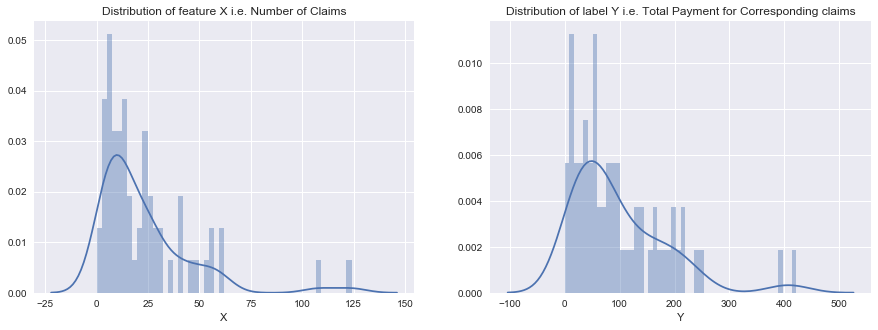

In [11]:
## Lets visualize using sea born and Matplotlib


fig,(ax1, ax2) = plt.subplots(1,2, figsize = (15,5))
ax1.set_title('Distribution of feature X i.e. Number of Claims')
sns.distplot(df.X,bins =50,ax=ax1)

ax2.set_title('Distribution of label Y i.e. Total Payment for Corresponding claims')
sns.distplot(df.Y,bins=50,ax =ax2)

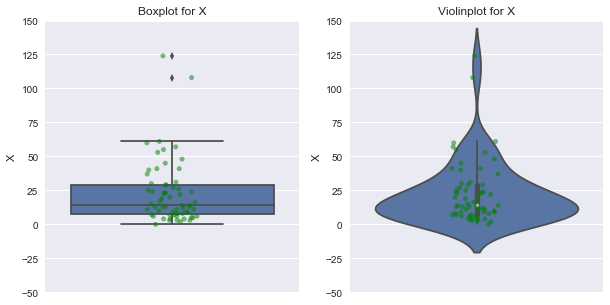

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))

ax1.set_ylim(-50,150)
ax1.set_title('Boxplot for X')
sns.boxplot(y='X',data=df,ax=ax1,)
sns.stripplot(y='X',color='green',data=df,jitter=True,ax=ax1,alpha=.5)

ax2.set_ylim(-50,150)
ax2.set_title('Violinplot for X')
sns.violinplot(y='X',data=df,ax=ax2)
sns.stripplot(y='X',color='green',data=df,jitter=True,ax=ax2,alpha=0.5)

In [ ]:
help sns.plot

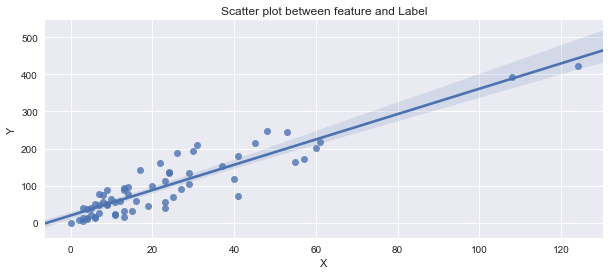

In [14]:
fig, (ax1) = plt.subplots(1,1,figsize = (10,4))
ax1.set_title('Scatter plot between feature and Label')
sns.regplot(data=df, x= 'X',y = 'Y', ax = ax1)

In [63]:
## lets train our Linear regression model 

In [25]:
X = df.X
Y = df.Y
regr = linear_model.LinearRegression()
regr.fit(X,Y)
Y_Pred = regr.predict(X)
mse = metrics.mean_squared_error(Y_Pred, Y)

C:\Users\C17000032\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 63]

In [26]:
X = pd.DataFrame(df.X)
Y = df.Y
regr = linear_model.LinearRegression()
regr.fit(X,Y)
Y_pred = regr.predict(X)
mse = metrics.mean_squared_error(Y_pred,Y)
rmse = (np.sqrt(mse))
rmse

35.365829968791466

In [27]:
regr_cv = linear_model.LinearRegression()
scores = cross_val_score(regr_cv, X,Y, cv = 10, scoring = 'mean_squared_error')
scores = scores* -1
rmse = np.mean(np.sqrt(scores))
rmse

C:\Users\C17000032\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\C17000032\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\C17000032\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\C17000032\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error 

35.634179006291205